#Split data into Training and Test sets

The first step in order to build our model for the Iris dataset, given that initial EDA did not indicate the need for further data preprocessing, is to split our dataset. We'll fit our model on the training set, and test it on the test set.  For this purpose we'll use scikit-learn's built-in "train_test_split" function. This function shuffles and splits our initial dataset into a training set with 75% of the samples, and a tess set with the remaining 30% of our observations.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

Sanity check:

In [63]:
print("X_train shape: \n{}".format(X_train.shape))
print("\n" + "y_train shape: \n{}".format(y_train.shape))
print("\n" + "X_test shape: \n{}".format(X_test.shape))
print("\n" + "y_test shape: \n{}".format(y_test.shape))

X_train shape: 
(112, 4)

y_train shape: 
(112,)

X_test shape: 
(38, 4)

y_test shape: 
(38,)


Check data types:

In [64]:
print("X_train type: \n{}".format(type(X_train)))
print("\n" + "X_test type: \n{}".format(type(X_test)))
print("\n" + "y_train type: \n{}".format(type(y_train)))
print("\n" + "y_test type: \n{}".format(type(y_test)))

X_train type: 
<class 'numpy.ndarray'>

X_test type: 
<class 'numpy.ndarray'>

y_train type: 
<class 'numpy.ndarray'>

y_test type: 
<class 'numpy.ndarray'>


#Data Visualization

Before blindly fitting models or any sophisticated machine learning technique, it's vital to inspect our data. This step may even show us that no modelling is necessary at all! Besides, abnormal measurements (outliers, missing data, or any other inconsistency) can be identified in this step

###Scatter Plot

In order to create this scatter plot, first we need to keep in mind that numpy arrays are not the best option for data inspection and visualization. Therefore, we can convert these arrays into a Pandas DataFrame because its table format with labelled columns and row indexing is easier to manipulate

######Create DataFrame

In [99]:
import pandas as pd
import mglearn

In [82]:
iris_df = pd.DataFrame(X_train, columns= iris_dataset['feature_names'])

######Inspect DataFrame

In [83]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [118]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.222321
std,0.871314,0.436196,1.800697,0.782662
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28d3a9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a19845908>]], dtype=object)

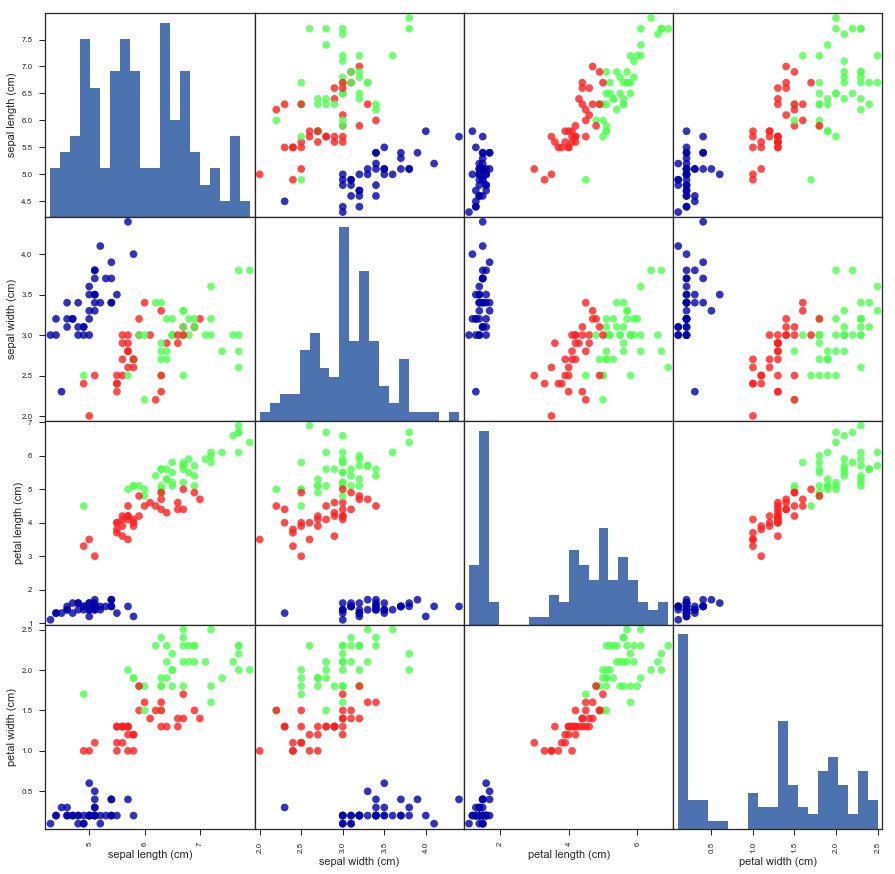

In [100]:
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15, 15), marker='o', hist_kwds= {'bins': 20}, s=60, alpha=.8, cmap= mglearn.cm3)

#####Alternative approach with SeaBorn (before train/test split, though)

import seaborn as sns
sns.set(style="ticks", color_codes=True)

iris = sns.load_dataset("iris")

g = sns.pairplot(iris, hue="species")

#####Alternative approach with list(map(lambda x)) (before train/test split, though)
iris = load_iris()
df=pd.DataFrame(iris.data)
colMap={0:"red",1:"blue",2:"green"}
cols=list(map(lambda x:colMap.get(x),iris.target))
scatter_matrix(df,  c=cols, figsize=(15, 15), marker='o', hist_kwds= {'bins': 20}, s=60, alpha=.8)

######Univariate Plots

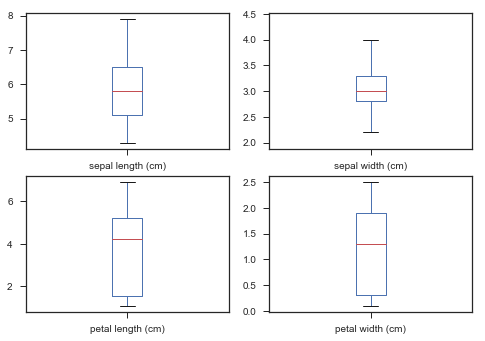

In [120]:
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Let's take a better view at the histograms of each feature in our dataset:

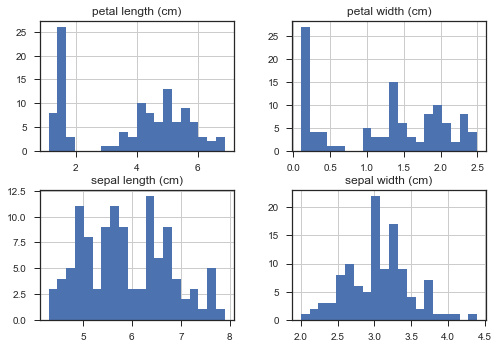

In [129]:
iris_df.hist(bins=20)
plt.show()

#Evaluate some Algorithms

Now we can try to fit some models on the training data and check their predictions on unseen (test) data. In this step we'll do the following:

* Use 10-k cross validation to estimate accuracy
* Fit 5 different models to our training set
* Check predictions of each model
* Select the model with best performance on test set

######k-fold cross validation

In k-fold validation, the training set is split into k smaller sets. Then, we follow the following steps:

*A model is trained using k-1 of the folds as training data;

*The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).


######K-nearest Neighbour

This is the first classification model that we'll use. Given that our dataset is relatively small, k-nearest is a good way to start our efforts to learn a model with the performance level we seek to achieve. 

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [181]:
scores_knn = cross_val_score(knn_model, X_train, y_train, cv=10)
print(scores_knn)

[ 0.92307692  0.91666667  0.91666667  1.          1.          1.          1.
  0.8         1.          0.9       ]


In [182]:
print("Average Cross-validation score for K-nn: {:.2f} (+/- {:.2f})".format(scores_knn.mean(), scores_knn.std() *2))

Average Cross-validation score for K-nn: 0.95 (+/- 0.13)


######Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [147]:
log_reg = LogisticRegression()

Cross-validation Scores:

In [148]:
scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=10)
print(scores)

[ 1.          0.83333333  1.          1.          0.90909091  1.          1.
  0.8         1.          0.9       ]


Cross-validation accuracy:

In [160]:
print("Average Cross-validation score for Log Regression: {:.2f}".format(scores_log_reg.mean()))

Average Cross-validation score for Log Regression: 0.94


This last result indicates that we can expect the model to be around 94% accurate on average. 
It's also important to note that the range of our scores spans from 83% to 100%. This may deserve further investigation 
in a real life scenario. However, this could also be due to the small dataset at hand for this exercise.

######Support Vector Machine (linear kernel)

In [153]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [156]:
svm_model = svm.SVC(kernel='linear', C=1)

Cross-validation Scores:

In [157]:
scores_svm = cross_val_score(svm_model, X_train, y_train, cv=10)
print(scores_svm)

[ 1.   1.   1.   1.   1.   1.   1.   0.9  1.   0.9]


Cross-validation accuracy and 95% confidence interval:

In [177]:
print("Average Cross-validation score for SVM: {:.2f} (+/- {:.2f})".format(scores_svm.mean(), scores_svm.std() *2))

Average Cross-validation score for SVM: 0.98 (+/- 0.08)


Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)